<a href="https://colab.research.google.com/github/muhamadsyahrulfahreza/222310053-UAS-PPB/blob/main/UTS_Kelompok_Syahrul_Fahreza(2222310053)_Haykal_Fadhillah(222310040)_Fajar_Nurullah(222310050).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No. 2 Nama & jenis atribut + nilai kategorik unik

Age→ Numerik kontinu (tahun).

Sex→ Kategorik biner (nominal) : biasanya M, F.

ChestPainType→ Kategorik nominal : contoh unik: TA(typical angina), ATA(atypical angina), NAP(non-anginal pain), ASY(asymptomatic).

RestingBP→ Numerik kontinu (mm Hg).

Cholesterol→ Numerik kontinu (mg/dl).

FastingBS→ Kategori biner (0 = < 120 mg/dl, 1 = ≥ 120 mg/dl). Secara teknis integer, tapi maknanya kategori.

RestingECG→ Kategorik nominal : contoh Normal, ST, LVH.

MaxHR→ Numerik kontinu (detak per menit).

ExerciseAngina→ Kategori biner (nominal) : Y, N.

Oldpeak→ Angka kontinyu (depresi ST).

ST_Slope→ Kategori ordinal : Up, Flat, Down(ada urutan naik–datar–turun).

HeartDisease→ Label / Target, kategorik biner : 0= tidak penyakit jantung, 1= penyakit jantung.

No 3 Pemerosesan awal dengan pyton

In [1]:
# --- 0. Setup ---
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- 1. Load data ---
url = "https://t2m.io/LaN8isBe"  # ganti dengan link dataset asli dari soal
df = pd.read_csv(url)

# Lihat beberapa baris awal
print(df.head())
print(df.info())

# --- 2. Pisahkan fitur (X) dan label (y) ---
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# --- 3. Identifikasi kolom numerik & kategorik ---
numeric_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
categorical_features = ["Sex", "ChestPainType", "FastingBS",
                        "RestingECG", "ExerciseAngina", "ST_Slope"]

# --- 4. Statistik deskriptif sebelum preprocessing ---
print("\n===== Statistik deskriptif sebelum preprocessing =====")
print(df.describe(include="all"))

# --- 5. Pipeline preprocessing ---

# Imputer mean untuk numerik + StandardScaler
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Imputer most_frequent untuk kategorik + OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Gabung ke ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# --- 6. Fit-transform X untuk melihat hasil praproses lengkap (optional untuk soal 3e) ---
X_preprocessed = preprocess.fit_transform(X)

print("\nShape setelah preprocessing:", X_preprocessed.shape)

# Untuk statistik deskriptif setelah scaling+encoding,
# kita ubah ke DataFrame sementara (fitur one-hot akan banyak)
X_processed_df = pd.DataFrame(X_preprocessed.toarray()
                              if hasattr(X_preprocessed, "toarray")
                              else X_preprocessed)

print("\n===== Statistik deskriptif setelah preprocessing =====")
print(X_processed_df.describe())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA      140.0        289.0          0     Normal  172.0   
1   49   F           NAP      160.0          NaN          0     Normal  156.0   
2   37   M           ATA      130.0        283.0          0         ST   98.0   
3   48   F           ASY      138.0        214.0          0     Normal  108.0   
4   54   M           NAP      150.0        195.0          0     Normal  122.0   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

Memisahkan prediktor & label ✔

SimpleImputer (rata-rata numerik, kategorik paling_sering) ✔

StandardScaler untuk numerik ✔

Encoding kategorik (tambahan yang kamu jelaskan di 1c) ✔

Menampilkan statistik deskriptif sebelum & sesudah ✔

No. 4 Model klasifikasi (Random Forest + holdout 85/15)

Akurasi: 0.8985507246376812
Confusion Matrix:
 [[55  7]
 [ 7 69]]


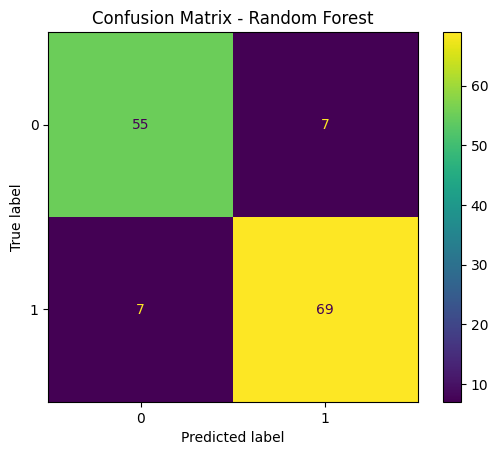

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- 1. Split data: 85% train, 15% test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# --- 2. Buat pipeline: preprocessing + model ---
clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

# --- 3. Train model ---
clf.fit(X_train, y_train)

# --- 4. Evaluasi ---
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Akurasi:", acc)
print("Confusion Matrix:\n", cm)

# Visualisasi confusion matrix (optional, tapi bagus untuk jawaban)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.named_steps["model"].classes_)
fig, ax = plt.subplots()
disp.plot(ax=ax)
plt.title("Confusion Matrix - Random Forest")
plt.show()


Algoritma yang dipakai: Random Forest.

Teknik pemisahan: holdout 85% train, 15% test dengan train_test_split.

Laporkan nilai akurasi dan konfusi matriks dari output.

No. 5 Model clustering (K-Means, SSE, silhouette)

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- 1. Gunakan seluruh data (X) yang sudah dipraproses ---
X_all = preprocess.fit_transform(X)  # atau gunakan yg sudah fit sebelumnya

# --- 2. Tentukan jumlah cluster, misalnya k=2 (risiko rendah vs tinggi)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_all)

# --- 3. Hitung SSE (Sum of Squared Errors) ---
# Dalam sklearn, SSE = inertia_
sse = kmeans.inertia_

# --- 4. Hitung silhouette score ---
labels = kmeans.labels_
sil_score = silhouette_score(X_all, labels)

print("Jumlah cluster (k):", k)
print("SSE:", sse)
print("Silhouette Score:", sil_score)


Jumlah cluster (k): 2
SSE: 5875.484795288866
Silhouette Score: 0.18003858357768207


Metode clustering yang digunakan adalah K-Means dengan jumlah cluster misalnya k=2 untuk mengelompokkan pasien berdasarkan kesamaan karakteristik klinis. Nilai SSE diperoleh dari inertia_model K-Means, sedangkan kualitas evaluasi cluster dievaluasi menggunakan skor siluet; semakin kecil SSE dan semakin mendekati 1 nilai skor siluet, semakin baik pemodelan cluster yang terbentuk.

No. 6 rangkuman untuk laporan tertulis

Struktur yang bisa langsung kamu pakai untuk bagian laporan (ringkas, tapi lengkap):

a. Nama & jenis atribut

menjelaskan seperti jawaban nomor 2: masing-masing atribut, tipe data, mana prediktor dan mana label.

Terangkan bahwa HeartDiseasediperlakukan sebagai variabel target biner.

B. Statistik deskriptif sebelum & sesudah preprocessing

Tuliskan poin-poin:

Rata-rata, minimum, maksimum Age, RestingBP, Cholesterol, MaxHR, Oldpeak.

Distribusi kategori (proporsi Sex, jenis ChestPainType, dsb).

Suatu spekulasi jika ada missing value dan bagaimana diimputasi (mean untuk numerik, modus untuk kategorik).

Setelah preprocessing: fitur numerik sudah distandarisasi (mean ≈ 0, std ≈ 1), fitur kategorik direpresentasikan sebagai vektor one-hot.

C. Pembahasan model klasifikasi

Contoh isi:

Model: Hutan Acak.

Pembagian data 85%:15% menggunakan ketidaksepakatan.

menjelaskan sedikit parameter utama.

Laporkan akurasi, serta interpretasi singkat matriks konfusi (berapa benar/ salah tiap kelas).

Kesimpulan singkatnya: model cukup baik/kurang, kemungkinan penyebabnya.

D. Pembahasan model clustering

Model: K-Means dengan k yang kamu pilih (misal k=2).

Menjelaskan arti cluster secara umum (cluster 0: profil risiko lebih rendah, cluster 1: lebih tinggi, berdasar rata-rata fitur).

Laporkan nilai SSE dan skor siluet, serta interpretasi apakah cluster cukup terpisah.

e. Identitas

Cantumkan nama, NPM, kelas semua anggota kelompok sesuai instruksi.

Kalau kamu mau, di pesan berikut aku bisa susunkan draft laporan versi lengkap Bab mini (poin 6) siap tempel Word.